# caponetto

In [4]:
!pip3 install git+https://github.com/caponetto/bayesian-hierarchical-clustering

  Cloning https://github.com/caponetto/bayesian-hierarchical-clustering to /private/var/folders/16/qdqq8l5d0kg5tj0qdylzkx7c0000gp/T/pip-req-build-in0npsic
  Running command git clone --filter=blob:none --quiet https://github.com/caponetto/bayesian-hierarchical-clustering /private/var/folders/16/qdqq8l5d0kg5tj0qdylzkx7c0000gp/T/pip-req-build-in0npsic
  Resolved https://github.com/caponetto/bayesian-hierarchical-clustering to commit d6659b32ab49124fd5e0070b8b190e94e649f2a5
  Preparing metadata (setup.py) ... done
You should consider upgrading via the '/Users/taikitanaka/.pyenv/versions/3.7.13/bin/python3.7 -m pip install --upgrade pip' command.


In [8]:
!git clone 'https://github.com/caponetto/bayesian-hierarchical-clustering'
!git clone 'https://github.com/caponetto/bayesian-hierarchical-clustering-examples'

fatal: destination path 'bayesian-hierarchical-clustering' already exists and is not an empty directory.
Cloning into 'bayesian-hierarchical-clustering-examples'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 0), reused 23 (delta 0), pack-reused 0
Receiving objects: 100% (26/26), 140.93 KiB | 710.00 KiB/s, done.


In [1]:
!cd bayesian-hierarchical-clustering && python setup.py install

running install
running bdist_egg
running egg_info
writing bhc.egg-info/PKG-INFO
writing dependency_links to bhc.egg-info/dependency_links.txt
writing requirements to bhc.egg-info/requires.txt
writing top-level names to bhc.egg-info/top_level.txt
reading manifest file 'bhc.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'bhc.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-12.0-x86_64/egg
running install_lib
running build_py
UPDATING build/lib/bhc/_version.py
set build/lib/bhc/_version.py to '0.0.3+6.gd6659b3'
creating build/bdist.macosx-12.0-x86_64/egg
creating build/bdist.macosx-12.0-x86_64/egg/bhc
creating build/bdist.macosx-12.0-x86_64/egg/bhc/core
copying build/lib/bhc/core/brt.py -> build/bdist.macosx-12.0-x86_64/egg/bhc/core
copying build/lib/bhc/core/__init__.py -> build/bdist.macosx-12.0-x86_64/egg/bhc/core
copying build/lib/bhc/core/prior.py -> build/bdist.macosx-12.0-x86_64/egg/bhc/core
copying build/lib/bhc/core/bhc.py 

In [2]:
!pwd

/Users/taikitanaka/vsc/tdbccr/ipynb/tdb


In [12]:
from top2vec import Top2Vec
model = Top2Vec.load('../../public/data/visdata_top2vec.model')

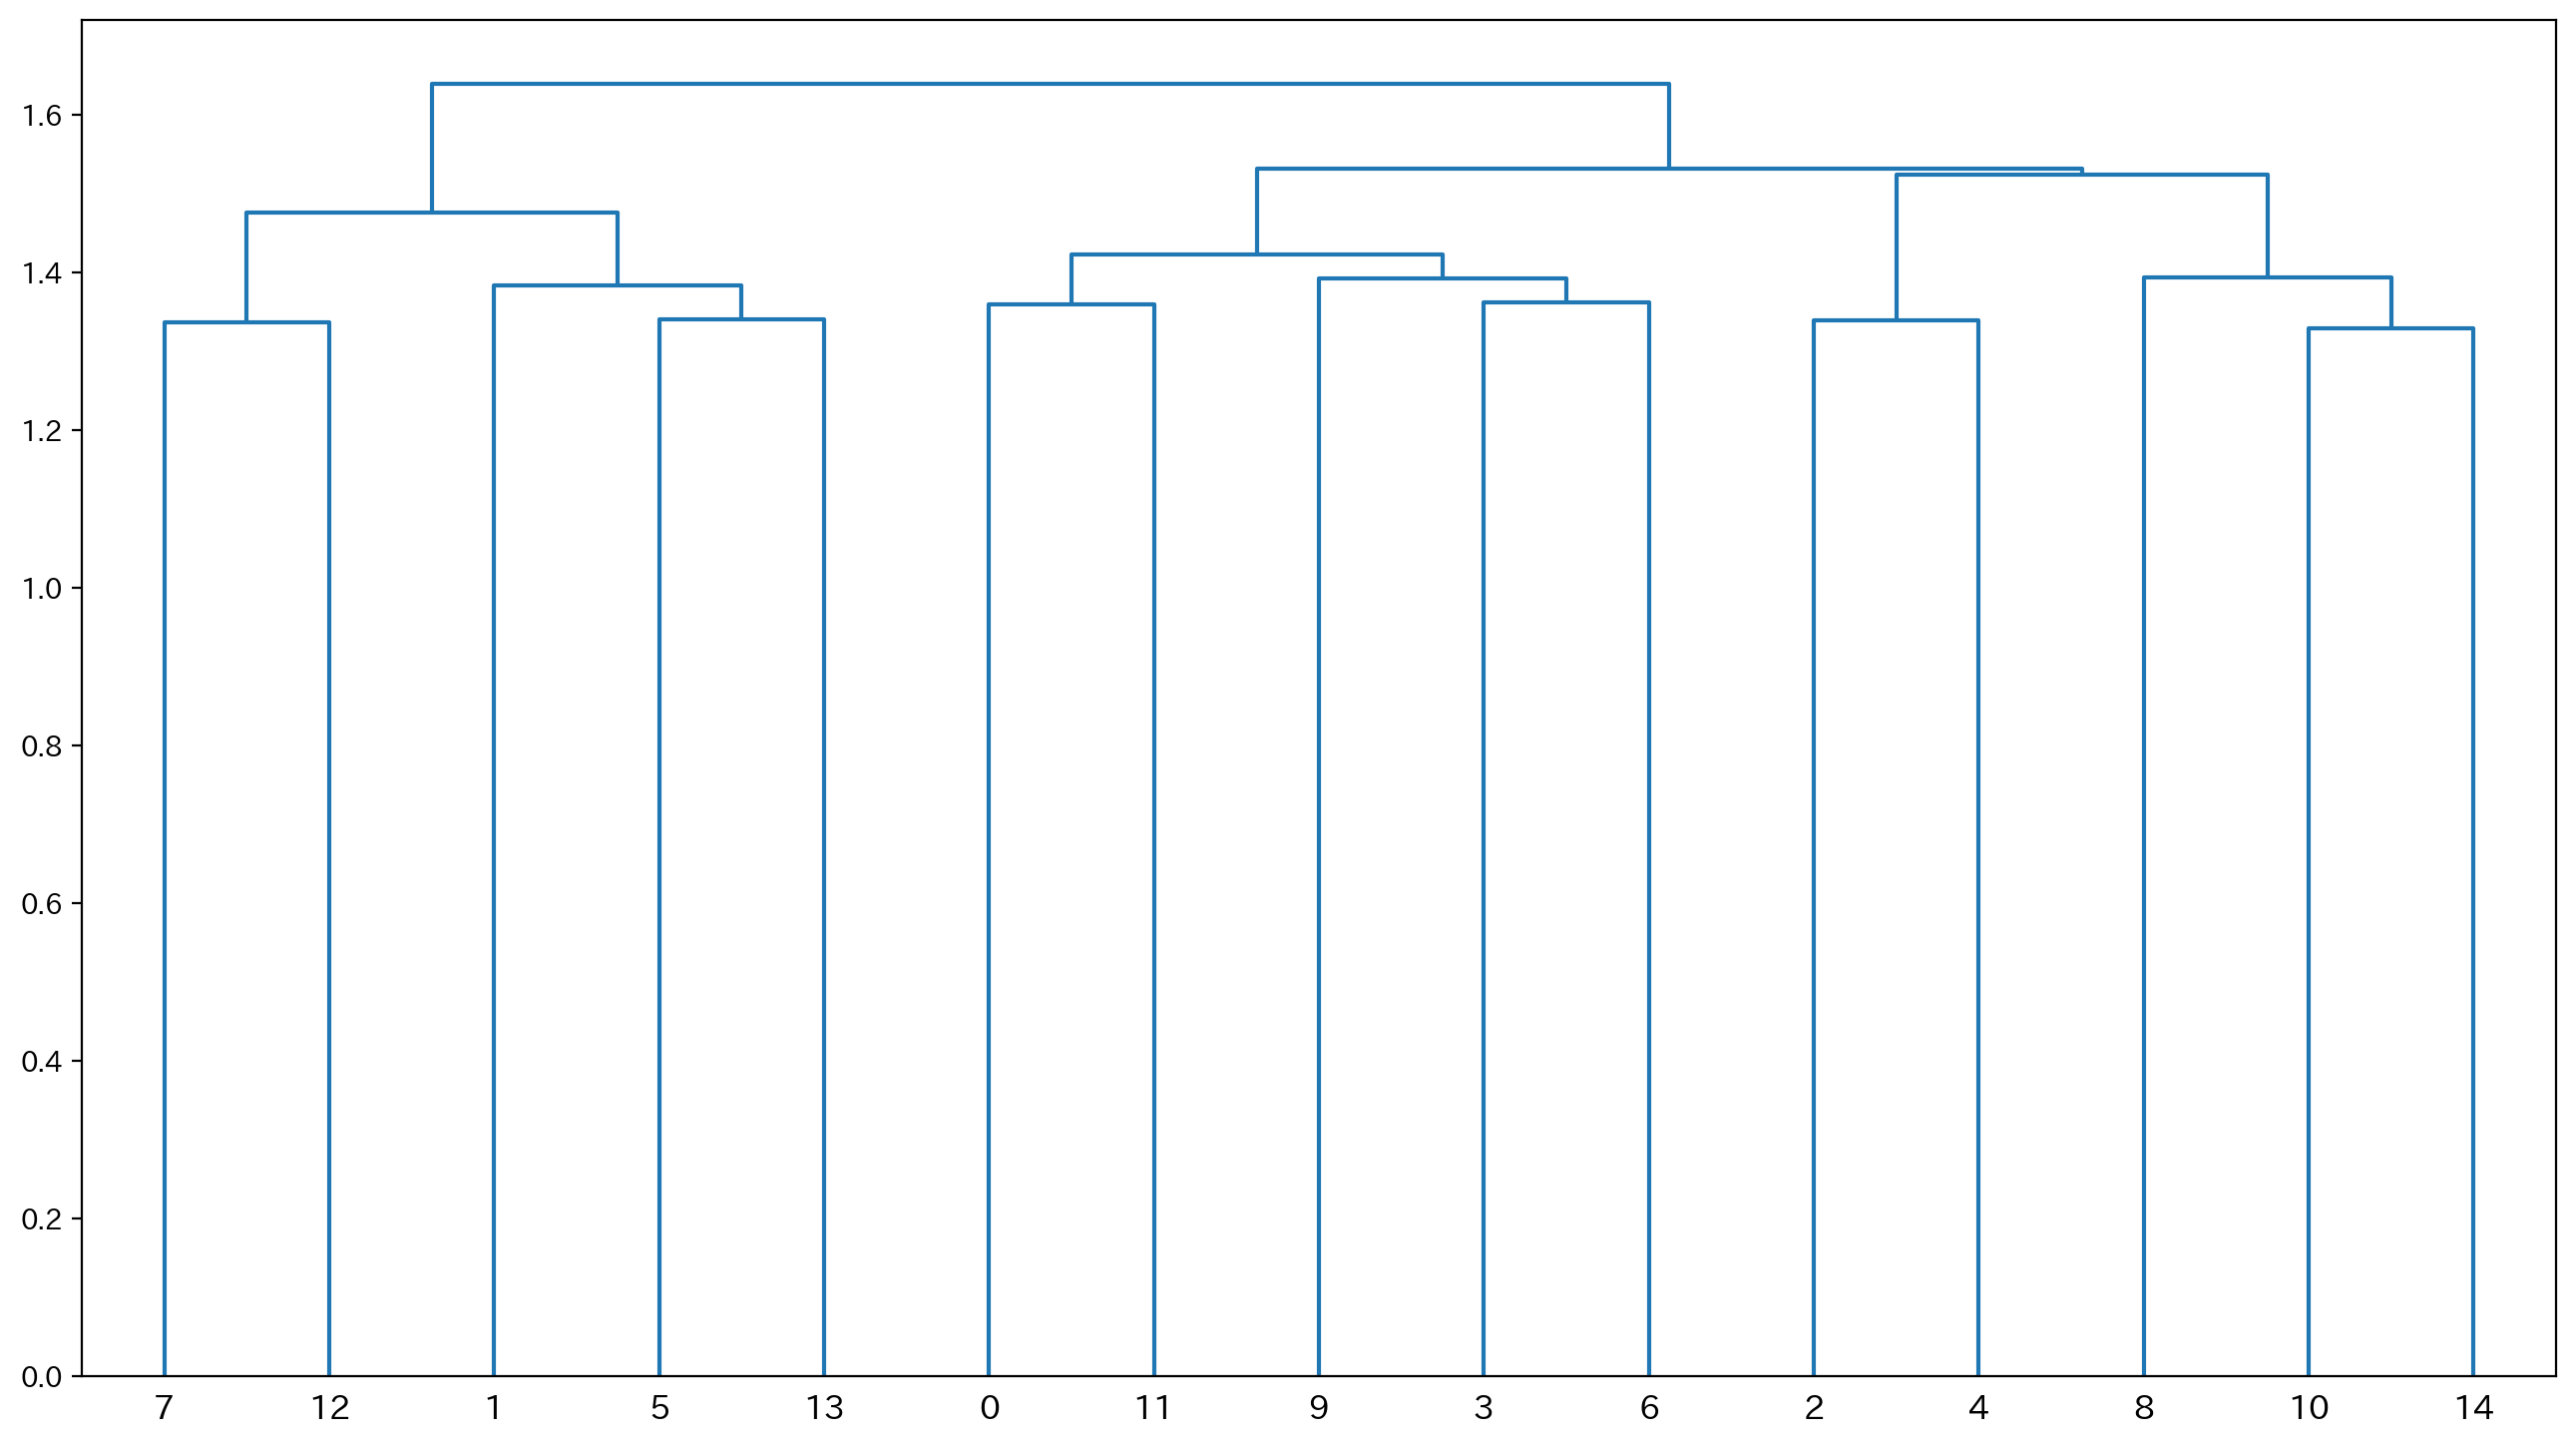

In [12]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(model.topic_vectors, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result)
plt.show()

In [2]:
for id in model.search_documents_by_topic(topic_num=0, num_docs=model.topic_sizes[0])[2]:
    print(f'{model.document_vectors[id]}')

[ 9.18758139e-02 -5.80388159e-02 -7.64981657e-02  9.17443186e-02
  7.56132081e-02 -3.07674538e-02  7.47320652e-02  3.61562297e-02
 -7.45424926e-02 -4.69418056e-03 -1.25031371e-03 -2.65037231e-02
  7.68271312e-02  2.20134128e-02  2.91948058e-02 -5.13133854e-02
  1.52626876e-02 -2.82937530e-02 -5.16991578e-02  9.08286572e-02
  9.29969773e-02  5.44762947e-02  4.63937744e-02 -8.94811749e-02
 -8.16892013e-02 -1.50371371e-02 -1.56823322e-02  8.44602212e-02
 -6.66874424e-02  7.64861610e-03 -6.87094256e-02 -9.73294899e-02
 -3.64578143e-02 -1.00444339e-01  8.23502317e-02  3.69395576e-02
 -1.67451147e-02  9.93942022e-02 -7.83924535e-02  9.50282514e-02
 -5.40662035e-02 -8.91114250e-02 -4.91911769e-02  7.24403886e-03
 -7.42499903e-02 -3.02931890e-02 -6.17722459e-02  3.82338092e-02
 -7.83654749e-02  4.89317738e-02 -7.13043660e-02  8.85384828e-02
  4.54933936e-04 -4.93423641e-02 -3.17954049e-02  9.33992094e-04
 -6.31615520e-02 -8.38172287e-02 -4.75200191e-02 -8.20816010e-02
  4.51484472e-02 -8.00865

In [35]:
import umap
umap_model = umap.UMAP(n_neighbors = 15,
                        n_components = 5,
                        metric = 'cosine',
                        random_state = 42).fit(model.document_vectors)

In [24]:
umap_model.embedding_

array([[ 7.6475487 ,  0.72948563,  7.557947  ,  8.684147  ,  5.7882    ],
       [ 8.964977  ,  1.9576054 ,  5.485555  ,  8.803288  ,  6.077027  ],
       [ 9.93212   ,  2.7206771 , 10.215942  ,  5.92571   ,  7.30532   ],
       ...,
       [ 7.0848927 ,  1.1063852 ,  6.9111853 ,  7.8548994 ,  5.041946  ],
       [ 5.328957  ,  0.3904388 ,  9.525988  ,  8.844798  ,  6.7461877 ],
       [10.205575  ,  3.009871  , 10.269948  ,  5.890133  ,  7.248678  ]],
      dtype=float32)

In [60]:
model.topic_sizes

0     243
1     241
2     236
3     236
4     229
5     227
6     223
7     220
8     219
9     215
10    214
11    213
12    210
13    205
14    190
dtype: int64

In [74]:
umap_model.embedding_

array([[6.0867767, 6.099301 , 4.4275503, 4.4954295, 4.7267265],
       [5.5707746, 5.994409 , 4.3936224, 4.5566278, 5.544402 ],
       [5.5042872, 5.3750877, 3.3914688, 6.327189 , 4.9650807],
       ...,
       [4.8783665, 5.4369802, 4.3054137, 5.806995 , 5.5137076],
       [5.4293118, 5.4348726, 4.4853826, 6.3734016, 4.1912193],
       [5.9827733, 5.1098976, 3.9215567, 4.4000173, 5.577861 ]],
      dtype=float32)

In [36]:
import csv
import random
with open('/Users/taikitanaka/vsc/tdbccr/ipynb/tdb/bayesian-hierarchical-clustering-examples/data/testdata.csv', 'w') as f:
    writer = csv.writer(f)
    # writer.writerows(random.sample(list(umap_model.embedding_), 100))
    # for id in model.search_documents_by_topic(topic_num=0, num_docs=model.topic_sizes[0])[2]:
    #     writer.writerow(model.document_vectors[id])
    vectors = []
    for id in model.search_documents_by_topic(topic_num=0, num_docs=model.topic_sizes[1])[2]:
        vectors.append(umap_model.embedding_[id])
    writer.writerows(vectors)

In [37]:
!cd bayesian-hierarchical-clustering-examples && python example.py

In [8]:
from bhc import (BayesianHierarchicalClustering,
                 BayesianRoseTrees,
                 NormalInverseWishart)

In [38]:
import numpy as np
data = np.genfromtxt('/Users/taikitanaka/vsc/tdbccr/ipynb/tdb/bayesian-hierarchical-clustering-examples/data/testdata.csv', delimiter=',')

In [39]:
g = 10 #
scale_factor = 0.001
alpha = 0.5

model = NormalInverseWishart.create(data, g, scale_factor)

brt_result = BayesianRoseTrees(data,
                                model,
                                alpha,
                                cut_allowed=False).build()

In [40]:
len(brt_result.node_ids)

321

In [41]:
import copy
cp = copy.copy(brt_result)

In [42]:
sorted(cp.weights)

[-0.6931471805599472,
 -0.6931471805599472,
 -0.6931471805599453,
 -0.6931471805599436,
 -0.693147180559917,
 -0.6931471805598903,
 -0.6931471805598903,
 -0.6931471805598903,
 -0.6931471805598903,
 -0.6931471805598903,
 -0.6931471805598903,
 -0.6931471805595493,
 -0.6931471802110707,
 -0.6931471799442903,
 -0.6931471789439456,
 -0.6931471714181896,
 -0.6931454970950739,
 -0.6929962029260963,
 -0.692991213992812,
 -0.692988064739346,
 -0.6929841690434557,
 -0.6923649019817946,
 -0.6918288263362413,
 -0.6917016801411506,
 -0.6906529073642247,
 -0.6870189809687446,
 -0.6825350505745362,
 -0.6680885080234589,
 -0.6604208182743747,
 -0.622764503668165,
 -0.6225236707216482,
 -0.5982001562303481,
 -0.5947219400443124,
 -0.5843622252798468,
 -0.5782713149089815,
 -0.45877919077795326,
 -0.41780105811919555,
 -0.4120766426993292,
 -0.2990804487371932,
 -0.1568977332899948,
 -0.05104143101362979,
 0.14770442790766225,
 0.45092429746919294,
 0.6960992038452309,
 0.9107219844367904,
 1.2074907534

In [43]:
for weight in brt_result.weights:
    print(weight)

15.307069419254582
16.835322921996692
15.13705624769382
16.124740761978753
15.604756847640871
15.020846345210495
14.7441532735162
14.648049464378293
14.81279915539278
14.588583812583991
14.712208590802272
14.587776954574643
14.520668924731996
14.281391583901698
14.27250715514832
14.152506292573037
13.895560907808724
13.79832495894177
13.689307958877134
13.493365990707552
13.490588392714402
13.39546015599203
13.586586378968985
13.743364757868616
13.37497180366882
13.31247399731106
13.26652502851158
13.180724212591166
13.008678631919537
12.992655788605065
12.75458139650838
12.738917330948693
12.732886490400642
12.612881441262394
12.559890530686278
12.538297575784656
12.514939960969482
12.458136114960114
12.3452634054681
12.14223306643527
12.048832937957085
11.983151410925737
11.951149299621344
11.884020068413482
11.79137304009073
11.77116595996268
12.195721077510374
11.673180287416914
11.651680669478848
12.194298225658244
11.607500695321704
11.525102343316515
11.376330111728237
11.315868

In [44]:
len(brt_result.arc_list)

320

In [45]:
for arc in brt_result.arc_list:
    print(arc)

280 -> 30
280 -> 89
280 -> 76
280 -> 161
280 -> 31
281 -> 162
281 -> 167
281 -> 17
281 -> 107
293 -> 39
293 -> 94
293 -> 59
332 -> 168
332 -> 203
332 -> 123
332 -> 202
343 -> 85
343 -> 226
343 -> 98
361 -> 70
361 -> 184
361 -> 204
374 -> 143
374 -> 146
374 -> 57
374 -> 151
374 -> 130
375 -> 125
375 -> 205
375 -> 238
375 -> 206
379 -> 93
379 -> 131
379 -> 116
380 -> 197
380 -> 227
380 -> 110
380 -> 111
390 -> 32
390 -> 225
390 -> 87
391 -> 60
391 -> 77
391 -> 199
395 -> 124
395 -> 129
395 -> 200
395 -> 28
396 -> 88
396 -> 126
396 -> 63
396 -> 201
399 -> 233
399 -> 239
399 -> 101
402 -> 145
402 -> 212
402 -> 137
403 -> 118
403 -> 222
403 -> 81
403 -> 214
403 -> 170
403 -> 230
403 -> 42
403 -> 47
405 -> 96
405 -> 103
405 -> 58
405 -> 192
405 -> 188
405 -> 237
406 -> 114
406 -> 153
406 -> 207
406 -> 217
406 -> 132
406 -> 142
406 -> 240
409 -> 5
409 -> 20
409 -> 49
409 -> 50
409 -> 13
409 -> 82
409 -> 14
409 -> 11
409 -> 2
409 -> 4
409 -> 25
409 -> 104
410 -> 33
410 -> 155
410 -> 159
415 ->

In [71]:
g = 20
scale_factor = 0.001
alpha = 1
degrees_of_freedom = data.shape[1] + 1
data_mean = np.mean(data, axis=0)
data_matrix_cov = np.cov(data.T)
scatter_matrix = (data_matrix_cov / g).T

In [72]:
scatter_matrix.shape[0]

5